Convolutional Neural Network (CNN) en CIFAR.

In [7]:
!wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
!tar -xzvf data.tar.gz
!rm data.tar.gz

--2018-04-27 18:34:22--  http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
Resolving octopus.inf.utfsm.cl (octopus.inf.utfsm.cl)... 200.1.19.31
Connecting to octopus.inf.utfsm.cl (octopus.inf.utfsm.cl)|200.1.19.31|:80... failed: Connection refused.
tar (child): data.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
rm: cannot remove 'data.tar.gz': No such file or directory


In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


---
> **Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida: (i) dos matrices Xtr, Ytr, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices Xt , Yt , correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices Xv,Yv, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.**

---



In [2]:
import matplotlib.pyplot as plt
def plot_data(loss,val_loss,acc,val_acc):
    plt.close('all')

    f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    axarr[0].set_title('MSE vs Epoch')
    axarr[0].plot(loss)
    axarr[0].plot(val_loss)
    axarr[0].set_xlabel('epoch')
    axarr[0].set_ylabel('mse')
    #plt.ylim(ymin=0, ymax=1)
    
    axarr[1].set_title('Acc vs Epoch')
    axarr[1].plot(acc)
    axarr[1].plot(val_acc)
    axarr[1].set_xlabel('epoch')
    axarr[1].set_ylabel('acc')
    #plt.ylim(ymin=0, ymax=1)

    axarr[1].legend(['entrenamiento', 'prueba'], loc='upper right')
    axarr[0].legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

In [15]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import _pickle as pickle
import numpy as np
import os
from imageio import imread
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix

def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
num_classes = len(label_names)

from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

In [4]:
x_train = X_train/255.0
x_test = X_test/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.09, random_state=42)

In [13]:
#x_train = X_train.reshape((X_train.shape[0],3,32,32))
#x_train = X_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
#x_test= X_test.reshape((X_test.shape[0],3,32,32))
#x_test= X_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

**C)** arquitectura C×P×C×P×F×F. Para ambas capas convolucionales utilice 64 filtros de 3×3 y funciones de activación ReLu. Para las capas de pooling utilice filtros de 2×2 con stride 2. Para la capa MLP escondida use 512 neuronas. 

In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [39]:

opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer=opt)


In [40]:
batch_size = 32
epochs = 25
history = model.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 14s 297us/step - loss: 1.9372 - acc: 0.3079 - val_loss: 1.7024 - val_acc: 0.4018
Epoch 2/25
45500/45500 [==============================] - 11s 243us/step - loss: 1.5409 - acc: 0.4496 - val_loss: 1.4623 - val_acc: 0.4769
Epoch 3/25
45500/45500 [==============================] - 11s 241us/step - loss: 1.3676 - acc: 0.5137 - val_loss: 1.3307 - val_acc: 0.5262
Epoch 4/25
45500/45500 [==============================] - 11s 239us/step - loss: 1.2563 - acc: 0.5548 - val_loss: 1.2418 - val_acc: 0.5571
Epoch 5/25
45500/45500 [==============================] - 11s 238us/step - loss: 1.1509 - acc: 0.5964 - val_loss: 1.1906 - val_acc: 0.5773
Epoch 6/25
45500/45500 [==============================] - 11s 235us/step - loss: 1.1019 - acc: 0.6132 - val_loss: 1.1806 - val_acc: 0.5773
Epoch 7/25
45500/45500 [==============================] - 11s 237us/step - loss: 1.0579 - acc: 0.6327 - val_loss: 1.1

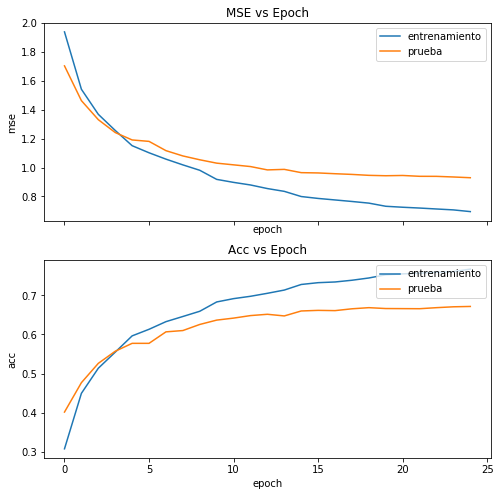

In [44]:
plot_data(history.history['loss'],history.history['val_loss'],history.history['acc'],history.history['val_acc'])

In [20]:
#E Usar el modelo hecho en C pero con rms prop
opt = rmsprop(lr=0.001, decay=1e-6)

batch_size = 75
epochs = 25
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
model1.summary()
history1 = model1.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 12s 261us/step - loss: 1.3487 - acc: 0.5229 - val_loss: 1.1897 - val_acc: 0.5740
Epoch 2/25
45500/45500 [==============================] - 12s 269us/step - loss: 0.9540 - acc: 0.6704 - val_loss: 0.9922 - val_acc: 0.6653
Epoch 3/25
45500/45500 [==============================] - 13s 278us/step - loss: 0.7818 - acc: 0.7329 - val_loss: 0.9111 - val_acc: 0.6913
Epoch 4/25
45500/45500 [==============================] - 11s 248us/step - loss: 0.6599 - acc: 0.7784 - val_loss: 0.8497 - val_acc: 0.7153
Epoch 5/25
45500/45500 [==============================] - 11s 246us/step - loss: 0.4265 - acc: 0.8575 - val_loss: 1.0323 - val_acc: 0.7251
Epoch 6/25
45500/45500 [==============================] - 13s 276us/step - loss: 0.3538 - acc: 0.8843 - val_loss: 0.9133 - val_acc: 0.7387
Epoch 7/25
45500/45500 [==============================] - 12s 268us/step - loss: 0.2997 - acc: 0.9005 - val_loss: 0.9

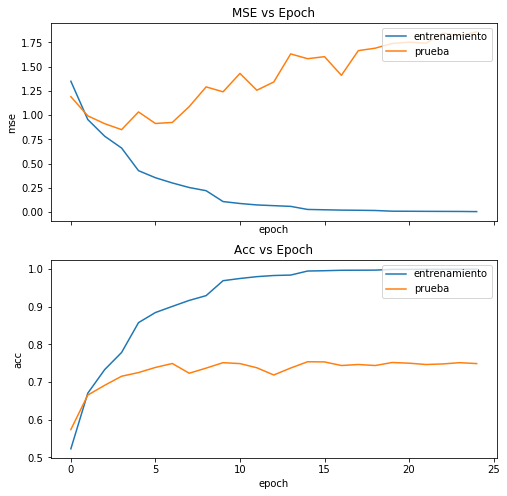

In [45]:
plot_data(history1.history['loss'],history1.history['val_loss'],history1.history['acc'],history1.history['val_acc'])

Se observa que al usar Rmsprop se forma overfitting en el entramiento mucho mayor comparado a SGD con momentum.

**F)**

In [46]:
#Shallow network
nc = 2#convolutional filter size
epochs = 15
history_d = []
for nc in [2,3,4,5]:
    print('\n'+'------------- nc = '+str(nc)+'-------------\n')
    model_d = Sequential()
    model_d.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model_d.add(Activation('relu'))
    model_d.add(MaxPooling2D(pool_size=(2, 2)))
    model_d.add(Conv2D(64, (nc, nc), padding='same'))
    model_d.add(Activation('relu'))
    model_d.add(MaxPooling2D(pool_size=(2, 2)))
    model_d.add(Flatten())
    model_d.add(Dense(512))
    model_d.add(Activation('relu'))
    model_d.add(Dense(10))
    model_d.add(Activation('softmax'))
    model_d.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
    model_d.summary()
    history_d.append(model_d.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate]))


------------- nc = 2-------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
activation_65 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
activation_66 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 4096

activation_73 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 64)        65600     
_________________________________________________________________
activation_74 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               2097664   
_________________________________________________________________
activation_75 (Activation)   (None, 512)               0         
__________

RED con nc:0


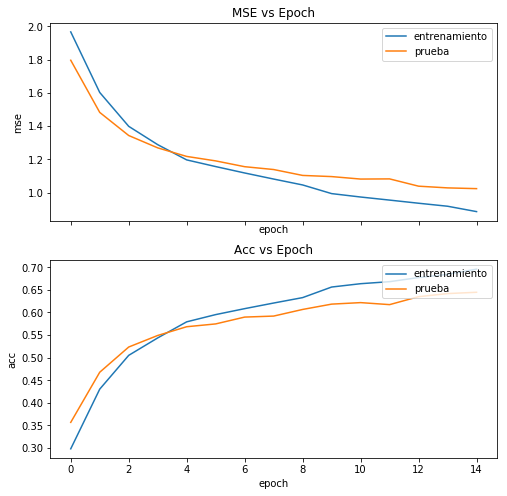

RED con nc:1


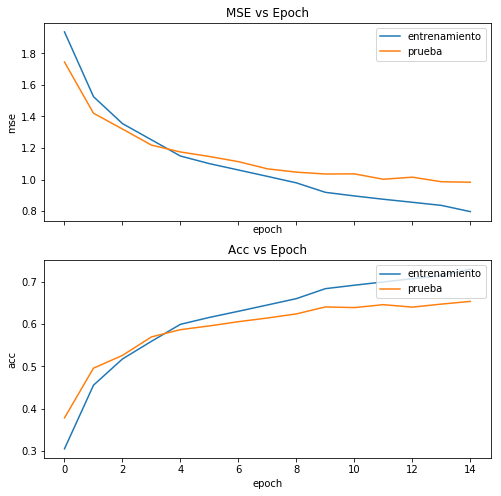

RED con nc:2


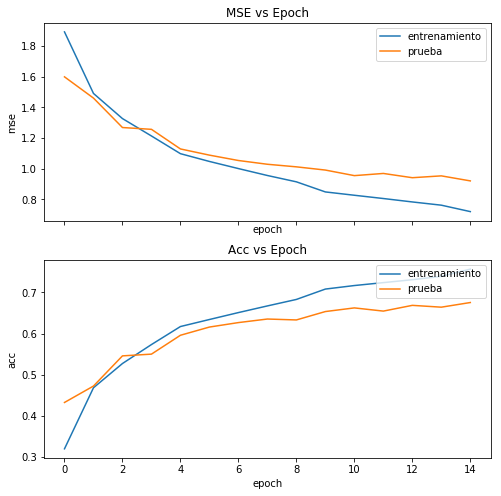

RED con nc:3


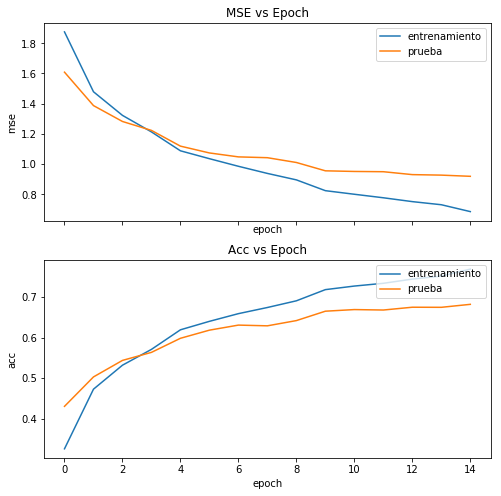

In [47]:
for i in [0,1,2,3]:
    print('RED con nc:'+str(i))
    plot_data(history_d[i].history['loss'],history_d[i].history['val_loss'],history_d[i].history['acc'],history_d[i].history['val_acc'])

Para la red profunda, los graficos no presentan una tendencia marcada al incrementar el tamaño del filtro.

In [48]:
history_s = []
for nc in [2,3,4,5]:
    print('\n'+'------------- nc = '+str(nc)+'-------------\n')
    model_s = Sequential()
    model_s.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model_s.add(Activation('relu'))
    model_s.add(MaxPooling2D(pool_size=(2, 2)))
    model_s.add(Flatten())
    model_s.add(Dense(512))
    model_s.add(Activation('relu'))
    model_s.add(Dense(10))
    model_s.add(Activation('softmax'))
    model_s.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
    model_s.summary()
    history_s.append(model_s.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate]))


------------- nc = 2-------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        832       
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 512)               8389120   
_________________________________________________________________
activation_82 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10) 

Epoch 1/15
45500/45500 [==============================] - 14s 311us/step - loss: 1.8421 - acc: 0.3453 - val_loss: 1.6206 - val_acc: 0.4351
Epoch 2/15
45500/45500 [==============================] - 14s 310us/step - loss: 1.4854 - acc: 0.4734 - val_loss: 1.4067 - val_acc: 0.5029
Epoch 3/15
45500/45500 [==============================] - 14s 310us/step - loss: 1.3234 - acc: 0.5342 - val_loss: 1.3147 - val_acc: 0.5296
Epoch 4/15
45500/45500 [==============================] - 14s 309us/step - loss: 1.2258 - acc: 0.5681 - val_loss: 1.2175 - val_acc: 0.5702
Epoch 5/15
45500/45500 [==============================] - 14s 308us/step - loss: 1.1349 - acc: 0.6048 - val_loss: 1.1752 - val_acc: 0.5844
Epoch 6/15
45500/45500 [==============================] - 14s 306us/step - loss: 1.0972 - acc: 0.6171 - val_loss: 1.2163 - val_acc: 0.5702
Epoch 7/15
45500/45500 [==============================] - 14s 309us/step - loss: 1.0604 - acc: 0.6332 - val_loss: 1.1324 - val_acc: 0.6004
Epoch 8/15
45500/45500 [===


------------- nc = 0-------------



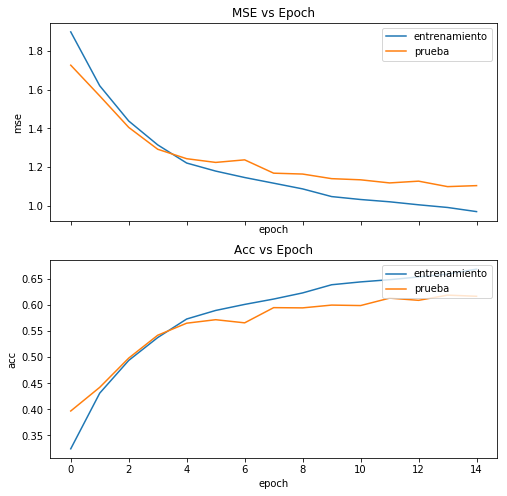


------------- nc = 1-------------



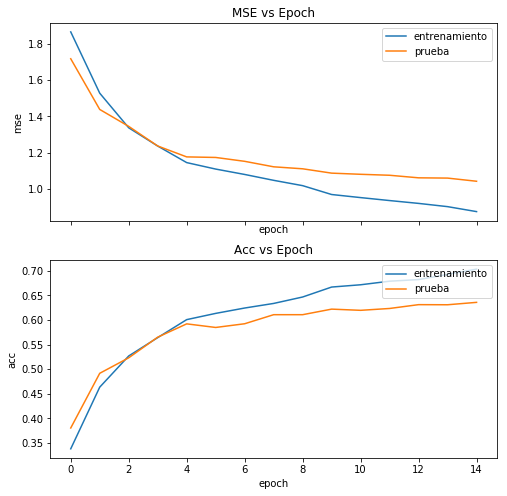


------------- nc = 2-------------



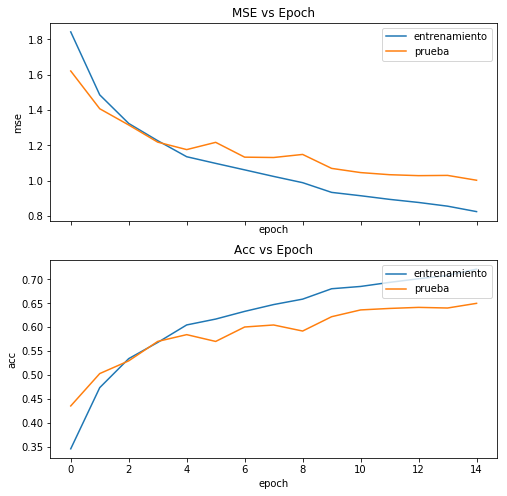


------------- nc = 3-------------



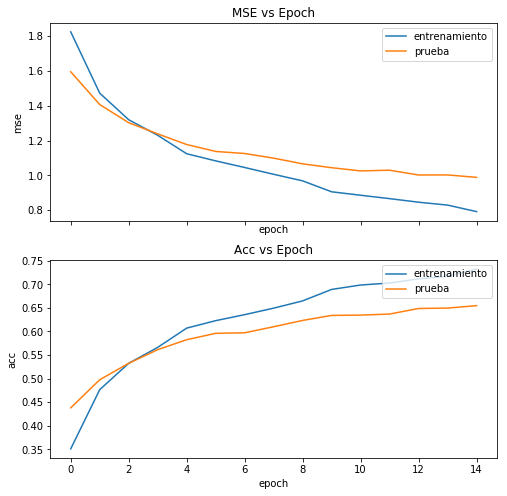

In [49]:
for i in [0,1,2,3]:
    print('\n'+'------------- nc = '+str(i)+'-------------\n')
    plot_data(history_s[i].history['loss'],history_s[i].history['val_loss'],history_s[i].history['acc'],history_s[i].history['val_acc'])

Para la red shallow, el incremento del tamaño del filtro incremento la accuracy en comparación a filtros más pequeños, especiaficamente el filtro de tamaño 5 (nc=5).

**G)**

In [50]:
epochs = 25

model4 = Sequential()
#C
model4.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
#C
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
#P
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
#C
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
#C
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
#P
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
#F
model4.add(Dense(512))
model4.add(Activation('relu'))
#F
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model4.summary()
history4 = model4.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_94 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 128)       73856     
__________

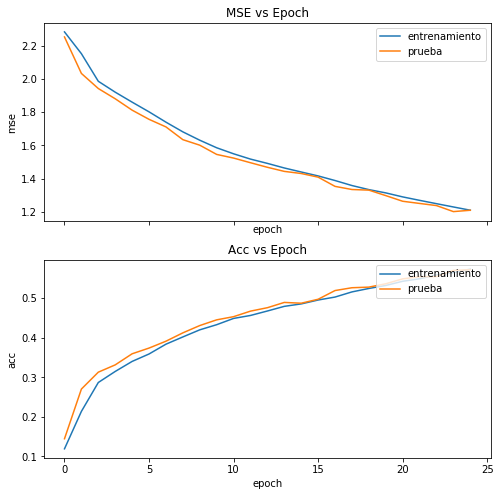

In [51]:
plot_data(history4.history['loss'],history4.history['val_loss'],history4.history['acc'],history4.history['val_acc'])

** H )**

In [52]:

model5 = Sequential()
#C
model5.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C with Stride
model5.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
#C with Stride
model5.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model5.add(Activation('relu'))

model5.add(Flatten())
#F
model5.add(Dense(512))
model5.add(Activation('relu'))
#F
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model5.summary()

history5 = model5.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_99 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_100 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_101 (Activation)  (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 128)       73856     
__________

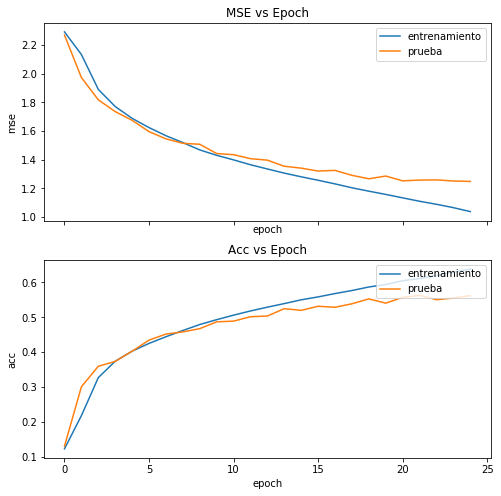

------------------------------------------------------------------------------------------


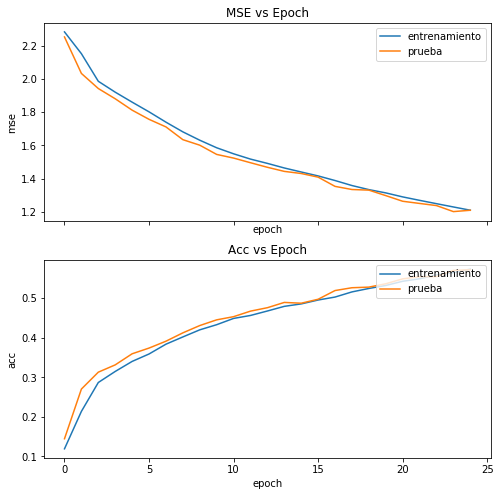

In [53]:
plot_data(history5.history['loss'],history5.history['val_loss'],history5.history['acc'],history5.history['val_acc'])
print('---'*30)
plot_data(history4.history['loss'],history4.history['val_loss'],history4.history['acc'],history4.history['val_acc'])

En comparación de la tecnica de pooling y de strides, se observa que el pooling puede ser reemplazado por strides. En cuanto al modelo con strice se nota overfitting mayor que el modelo con pooling dado a que el primero se ajusta mejor al entrenamiento que el segundo, pero el los datos de validación se nota una diferencia de 2% en contra de este.

** i) **

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)


In [39]:
#modelo usando en E
batch_size = 75
epochs = 25
model6 = Sequential()
model6.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(10))
model6.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
lrate = LearningRateScheduler(step_decay)
model6.compile(optimizer = opt, loss='categorical_crossentropy',metrics=['accuracy'])
model6.summary()
train_datagen = model6.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]//batch_size, epochs=epochs,validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_28 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
__________

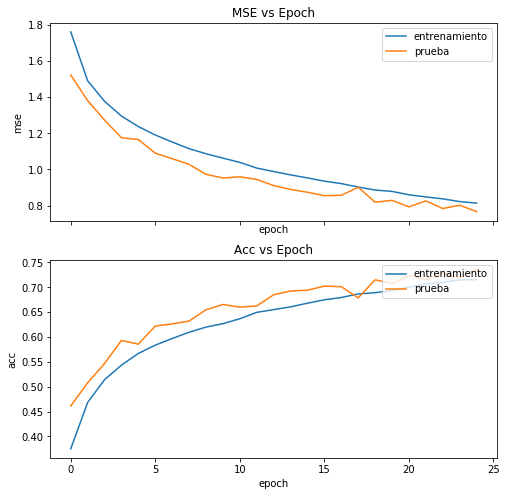

In [13]:
plot_data(train_datagen.history['loss'],train_datagen.history['val_loss'],train_datagen.history['acc'],train_datagen.history['val_acc'])

En teoria el rotar una imagen no va cambiar su etiqueta porque este objeto sigue siendo el mismo, lo que si cambiara es que se tendran más ejemplos, una capa convolucional será capaz de obtener caracteristicas que no fue capaz en ejemplos anteriores. Lo que se puede apreciar, esque en la practica, la accuracy del modelo con transformaciones no mejoro con respecto al anterior, pero si se nota claramente que el overfitting disminuyo considerablemente en la parte del entrenamiento, por lo que queda como trabajo futuro evaluar el *tradeoff* de más ejemplos transformados o más epochs. 

**j**

In [7]:
epochs = 25
batch_size = 128
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model_b = Sequential()
#C
model_b.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_b.add(Activation('relu'))
#C
model_b.add(Conv2D(64, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#P
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))
#C
model_b.add(Conv2D(128, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#C
model_b.add(Conv2D(128, (3, 3), padding='same'))
model_b.add(Activation('relu'))
#P
model_b.add(MaxPooling2D(pool_size=(2, 2)))
model_b.add(Dropout(0.25))
model_b.add(Flatten())
#F
model_b.add(Dense(512))
model_b.add(Activation('relu'))
#F
model_b.add(Dense(10))
model_b.add(Activation('softmax'))
model_b.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
model_b.summary()

history_b = model_b.fit(x_train, y_train,epochs=epochs,batch_size=batch_size,verbose=0, validation_data=(x_val, y_val),shuffle=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0      

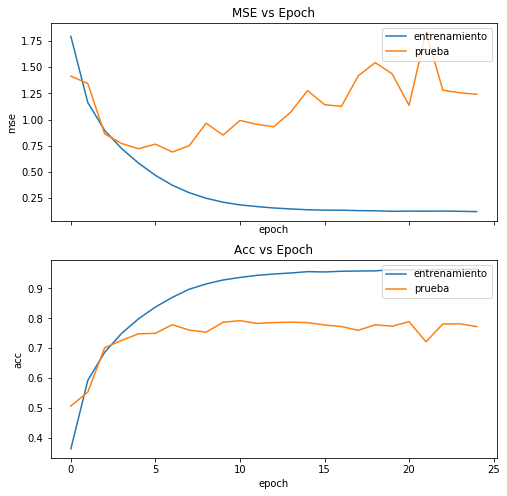

In [8]:
plot_data(history_b.history['loss'],history_b.history['val_loss'],history_b.history['acc'],history_b.history['val_acc'])

0 431
1 441
2 468
3 465
4 445
5 454
6 436
7 460
8 456
9 444
[[332   7  12  20  14   2   3   7  21  13]
 [  3 399   2  10   1   1   1   1  10  13]
 [ 33   2 302  45  29  25   9  14   5   4]
 [ 12   4  26 298  26  66  10  18   2   3]
 [  4   1  17  26 355   6   6  27   3   0]
 [  4   1  22  68  22 311   5  17   3   1]
 [  0   1  19  33  22  19 327   7   6   2]
 [  6   0   6  25  29   9   0 382   2   1]
 [ 10  13   4   5   1   4   1   4 407   7]
 [  7  34   2   7   9   2   1   5  14 363]]


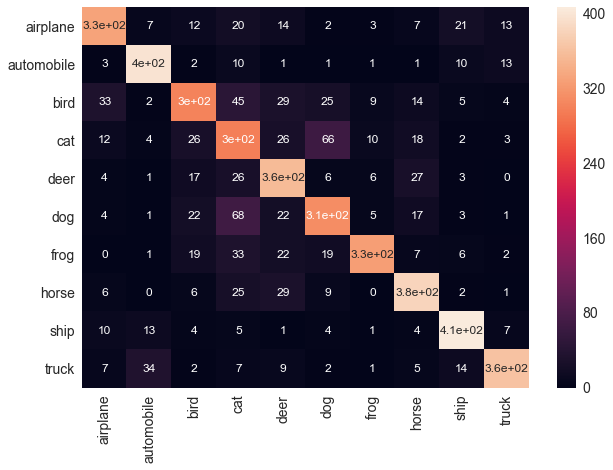

In [45]:
Y_pred = model_b.predict(x_val, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_val,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_val,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
                  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

Algunos ejemplos destacables de errores cometidos son, Automovils con Camiones. Esto se puede deber a que comparten caracteristicas como son las ruedas, vidrios y tal vez forma de chasis. Otros ejemplos importantes es la que se observa en el centro de la matriz de confusión. Estos pertenecen a animales, que comparte al igual caracteristicas como cantidad de patas, colas, pelo abultado o color. Lo más llamativos sería perros y gatos. Otro inusual es aeroplanos con pajaros, pero se puede argumentar que tal vez por las alas surgue la confusión.